In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Needed for coding
plt.rcParams["figure.figsize"] = (12, 6)
%matplotlib inline
%config IPCompleter.use_jedi = False

In [331]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [15]:
in_file = "SummaryofWeather.csv"
loc_file = "WeatherStationLocations.csv"

In [16]:
df_loc = pd.read_csv(loc_file)
df_loc

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333
...,...,...,...,...,...,...,...,...
156,33109,EL AQUINA,TS,3651N,01015E,4,36.850000,10.016667
157,33121,EL DJEM,TS,3520N,01040E,9999,35.333333,10.066667
158,33003,SISI AHMED,TS,3712N,00950E,4,37.200000,9.083333
159,33307,ADANA,TU,3659N,03518E,20,36.983333,35.016667


In [12]:
df_tot = pd.read_csv(in_file, parse_dates = [1], low_memory=False)
df_tot.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [37]:
complete_sta = df_tot.groupby("STA")["MeanTemp"].mean().nlargest(10)
complete_sta

STA
32603    30.165056
12101    28.982116
60701    28.294988
40601    28.065331
31401    27.977353
41204    27.694949
33121    27.606838
10701    27.437325
11606    27.380496
32503    27.276839
Name: MeanTemp, dtype: float64

In [38]:
complete_sta.index

Int64Index([32603, 12101, 60701, 40601, 31401, 41204, 33121, 10701, 11606,
            32503],
           dtype='int64', name='STA')

In [39]:
mask = df_loc["WBAN"].isin(complete_sta.index)

In [40]:
df_loc[mask]

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
18,32503,BAHREIN ISLAND,BN,2616N,05038E,1,26.266667,50.566667
29,60701,CANTON ISLAND,CT,0246S,17143W,3,-2.766667,-171.750000
33,31401,SHEIKH OTHMAN,DY,1252N,04458E,10,12.866667,44.866667
114,12101,ATAR,MT,2028N,01302W,235,20.466667,-13.033333
124,11606,WILLEMSTAD,NU,1211N,06857W,9,12.183333,-68.966667
130,41204,MANILA/AAF,PH,1430N,12100E,5,14.500000,121.066667
132,40601,KWAJALEIN/AFB,PI,0843N,16744E,3,8.716667,167.783333
134,32603,BHOLARI,PK,2519N,06812E,53,25.316667,68.183333
137,10701,BALBOA/ALBROOK,PM,0858N,07933W,9,8.966667,-79.500000
157,33121,EL DJEM,TS,3520N,01040E,9999,35.333333,10.066667


In [41]:
int_cols = ['Date','MeanTemp']
mask_22508 = df_tot["STA"] == 22508
df = df_tot.loc[mask_22508, int_cols]
df

,Date,MeanTemp
57877,1940-01-01,20.000000
57878,1940-01-02,19.444444
57879,1940-01-03,20.000000
57880,1940-01-04,21.111111
57881,1940-01-05,18.333333
...,...,...
60064,1945-12-27,20.555556
60065,1945-12-28,21.111111
60066,1945-12-29,20.000000
60067,1945-12-30,21.111111


In [42]:
df.dtypes

Date        datetime64[ns]
MeanTemp           float64
dtype: object

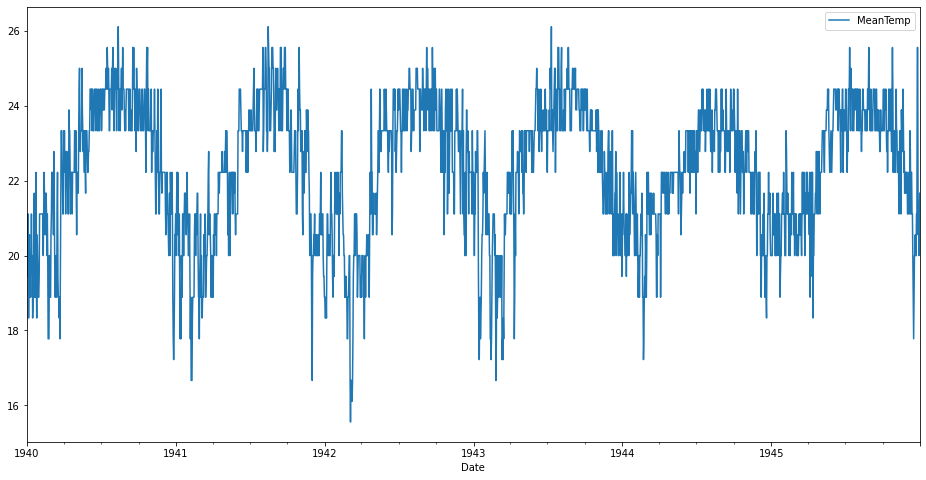

In [207]:
df.plot(x = "Date", y = "MeanTemp", figsize = (16,8));

In [319]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

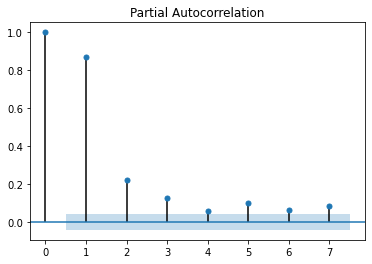

In [325]:
plot_pacf(df.MeanTemp, lags=7);

In [311]:
label_col = "MeanTemp"
data = pd.DataFrame(df.copy())
cols = []
# add the lag of the target variable from current steps back up to 24
for i in range(1, 8):
    new_col = 'lag_{}'.format(i)
    data[new_col] = data[label_col].shift(i)
    cols.insert(0,new_col)

cols.insert(0, "Date")
cols.append(label_col)

data = data.dropna()
data = data[cols]
data.head()

,Date,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,MeanTemp
57884,1940-01-08,20.000000,19.444444,20.000000,21.111111,18.333333,20.000000,20.555556,18.888889
57885,1940-01-09,19.444444,20.000000,21.111111,18.333333,20.000000,20.555556,18.888889,19.444444
57886,1940-01-10,20.000000,21.111111,18.333333,20.000000,20.555556,18.888889,19.444444,18.888889
57887,1940-01-11,21.111111,18.333333,20.000000,20.555556,18.888889,19.444444,18.888889,20.000000
57888,1940-01-12,18.333333,20.000000,20.555556,18.888889,19.444444,18.888889,20.000000,21.111111


In [243]:
mask = data.Date < '1945-01-01'
df_train = data[mask]
df_test = data[~mask]
df_train.tail()

,Date,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,Mean,STD,MeanTemp
59699,1944-12-27,18.333333,20.000000,20.000000,21.111111,21.111111,22.222222,21.111111,20.555556,1.242260,21.111111
59700,1944-12-28,20.000000,20.000000,21.111111,21.111111,22.222222,21.111111,21.111111,20.952381,0.766740,21.666667
59701,1944-12-29,20.000000,21.111111,21.111111,22.222222,21.111111,21.111111,21.666667,21.190476,0.674992,20.555556
59702,1944-12-30,21.111111,21.111111,22.222222,21.111111,21.111111,21.666667,20.555556,21.269841,0.528439,20.000000
59703,1944-12-31,21.111111,22.222222,21.111111,21.111111,21.666667,20.555556,20.000000,21.111111,0.717219,20.000000


In [244]:
df_test

,Date,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,Mean,STD,MeanTemp
59704,1945-01-01,22.222222,21.111111,21.111111,21.666667,20.555556,20.000000,20.000000,20.952381,0.831126,20.000000
59705,1945-01-02,21.111111,21.111111,21.666667,20.555556,20.000000,20.000000,20.000000,20.634921,0.674992,20.000000
59706,1945-01-03,21.111111,21.666667,20.555556,20.000000,20.000000,20.000000,20.000000,20.476190,0.674992,20.000000
59707,1945-01-04,21.666667,20.555556,20.000000,20.000000,20.000000,20.000000,20.000000,20.317460,0.629941,21.111111
59708,1945-01-05,20.555556,20.000000,20.000000,20.000000,20.000000,20.000000,21.111111,20.238095,0.437109,21.666667
...,...,...,...,...,...,...,...,...,...,...,...
60064,1945-12-27,20.555556,20.000000,20.000000,21.111111,21.111111,25.555556,25.555556,21.984127,2.481560,20.555556
60065,1945-12-28,20.000000,20.000000,21.111111,21.111111,25.555556,25.555556,20.555556,21.984127,2.481560,21.111111
60066,1945-12-29,20.000000,21.111111,21.111111,25.555556,25.555556,20.555556,21.111111,22.142857,2.366357,20.000000
60067,1945-12-30,21.111111,21.111111,25.555556,25.555556,20.555556,21.111111,20.000000,22.142857,2.366357,21.111111


In [245]:
X_train = df_train.iloc[:,1:-1].values
y_train = df_train.iloc[:,-1].values

In [246]:
X_test = df_test.iloc[:,1:-1].values
y_test = df_test.iloc[:,-1].values

In [247]:
X_train.shape

(1820, 9)

In [248]:
def model_evalutation(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rep = f"""
    Model R2 score: {r2:.2f}
    Model MSE: {mse:.2f}
    """
    print(rep)

In [249]:
reg  = LinearRegression()
params = {
    "normalize": [True, False], 
    "fit_intercept": [True, False]
}
grid_search = GridSearchCV(reg,cv = 5, param_grid=params, scoring = "r2")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [250]:
grid_search.best_params_

{'fit_intercept': True, 'normalize': True}

In [255]:
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)
model_evalutation(y_test, y_pred)


    Model R2 score: 0.69
    Model MSE: 0.74
    


In [256]:
def draw_true_forcasted(x, y_true, y_pred):
    data = {
        "Date": x,
        "True_temp": y_true,
        "Forcasted_temp": y_pred
    }
    res = pd.DataFrame(data)
    res.plot(x = "Date", figsize = (16,8))

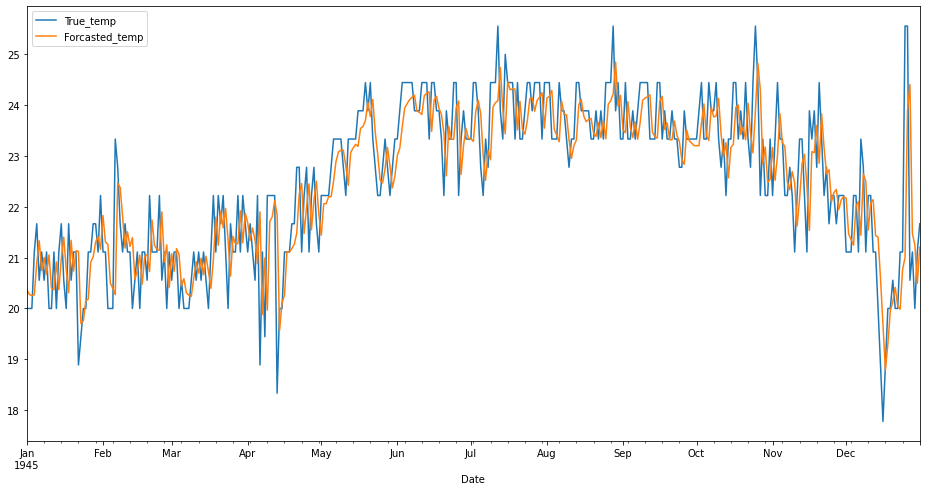

In [257]:
draw_true_forcasted(df_test["Date"], y_test, y_pred)

In [272]:
reg  = RandomForestRegressor(n_jobs=-1, random_state=909)
params = {
    "n_estimators": np.array(range(10,101,20)),
    "max_depth": [10,15,None],
    "max_features": ["auto", "sqrt"],
    "min_impurity_decrease": [0.0, 0.01]
}
grid_search = GridSearchCV(reg,cv = 5, param_grid=params, scoring = "r2")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=909),
             param_grid={'max_depth': [10, 15, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_impurity_decrease': [0.0, 0.01],
                         'n_estimators': array([10, 30, 50, 70, 90])},
             scoring='r2')

In [273]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_impurity_decrease': 0.01,
 'n_estimators': 70}

In [274]:
grid_search.best_score_

0.7634378437359797


    Model R2 score: 0.68
    Model MSE: 0.75
    


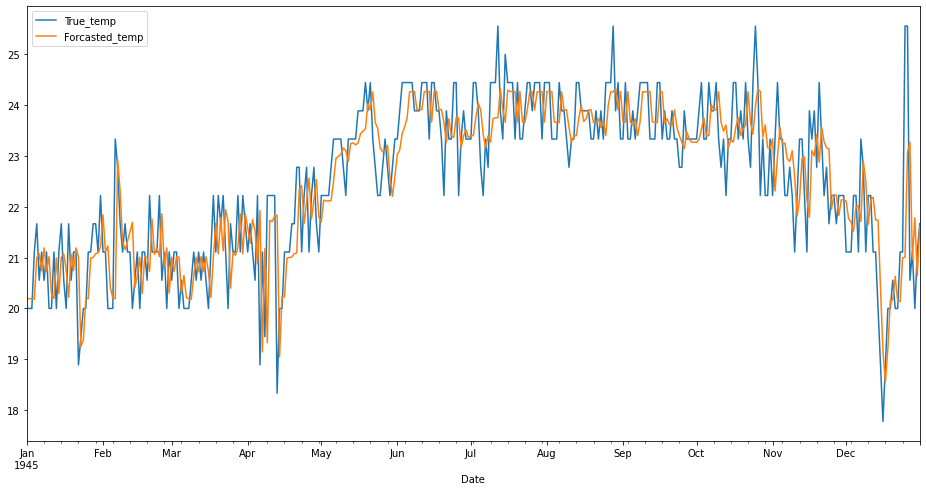

In [275]:
best_RF_reg = grid_search.best_estimator_
y_pred = best_RF_reg.predict(X_test)
model_evalutation(y_test, y_pred)
draw_true_forcasted(df_test["Date"], y_test, y_pred)

In [282]:
best_RF_reg.feature_importances_

array([6.83595751e-04, 3.82078863e-04, 1.28007914e-03, 8.31226004e-04,
       3.37790925e-03, 1.78523517e-03, 8.17380575e-01, 1.73058214e-01,
       1.22108683e-03])

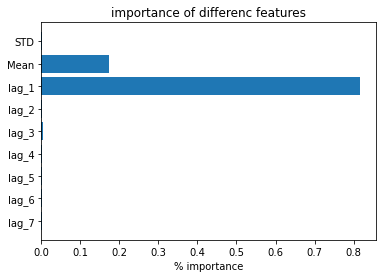

In [289]:
plt.barh(df_test.columns[1:-1], best_RF_reg.feature_importances_)
plt.title("importance of differenc features")
plt.xlabel("% importance");

In [269]:
poly_lasso_reg = make_pipeline(PolynomialFeatures(5), Lasso(tol = 0.4))
params = {
    "polynomialfeatures__degree": [5,8,10],
    "lasso__alpha": [0.01,.1]
}
grid_search = GridSearchCV(poly_lasso_reg, cv = 3, param_grid= params, scoring = "r2")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=5)),
                                       ('lasso', Lasso(tol=0.4))]),
             param_grid={'lasso__alpha': [0.01, 0.1],
                         'polynomialfeatures__degree': [5, 8, 10]},
             scoring='r2')

In [270]:
grid_search.best_params_

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 8}


    Model R2 score: 0.69
    Model MSE: 0.73
    


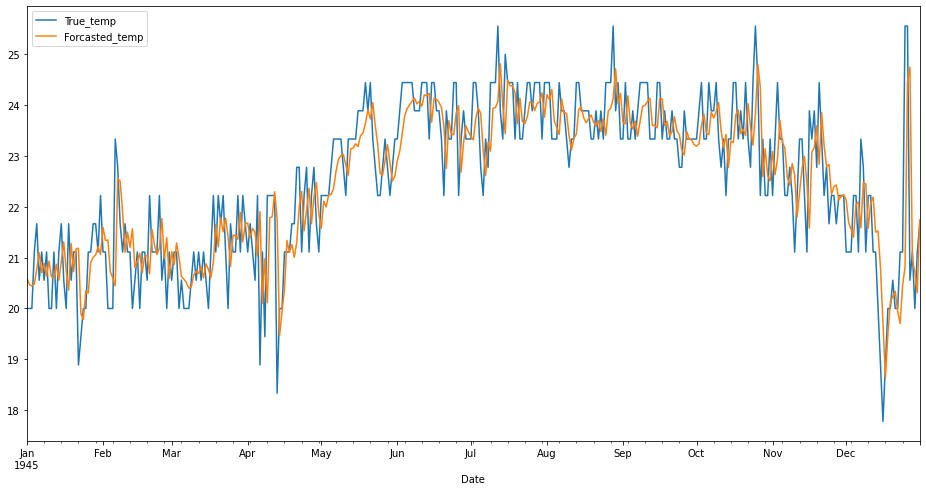

In [271]:
best_poly_lasso_reg = grid_search.best_estimator_
y_pred = best_poly_lasso_reg.predict(X_test)
model_evalutation(y_test, y_pred)
draw_true_forcasted(df_test["Date"], y_test, y_pred)